<a href="https://colab.research.google.com/github/diprotas/ML-notebooks/blob/main/26_4_SkillBox_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_cohort_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 26.4 Практическая работа
## Цели практической работы

Научиться проводить когортный анализ и оценивать удержание (retention) по количеству покупателей и по суммам заказов.


## Что нужно сделать

В этой практической работе используйте те же данные, которые были в видео.

    Подготовьте данные: проверьте их на наличие пропусков.
    Постройте два когортных анализа в Jupyter Notebook:
        для количества покупателей (user id);
        для сумм их покупок.
    Проанализируйте получившиеся графики и опишите результат. Что необычного вы заметили? Есть ли выбивающиеся когорты? У каких когорт лучшая возвращаемость клиентов, а у каких худшая? Что стоило бы ещё исследовать внимательнее на других данных?


## Рекомендации по выполнению

Файл с результатами работы должен содержать аналогичные разделы файла из видео.


## Что оценивается

    Когортный анализ проведён корректно, в соответствии с заданием.
    Файл содержит проверку на пропуски данных.
    В файле есть матрицы значений когортного анализа для количества покупателей (user id) и для сумм их покупок.
    Матрицы retention выполнены с необходимым форматированием.


## Как отправить работу на проверку

Пришлите на проверку файл Jupyter Notebook с проведённым когортным анализом через форму ниже.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd. read_excel('/content/drive/MyDrive/SkillBox/product_analytics/26.3_skillbox_cohort_analysis.xlsx')

In [7]:
data.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704840 entries, 0 to 704839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       704840 non-null  object        
 1   date          704840 non-null  datetime64[ns]
 2   price         704840 non-null  int64         
 3   month_year    704840 non-null  datetime64[ns]
 4   cohortMonth   704840 non-null  datetime64[ns]
 5   cohort_index  704840 non-null  int32         
dtypes: datetime64[ns](3), int32(1), int64(1), object(1)
memory usage: 29.6+ MB


In [26]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [10]:
data['month_year']=data['date'].apply(get_month)

In [11]:
data.head()

,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01


Следующий код выполняет группировку данных по полю «user_id» с помощью метода groupby. Затем для каждой группы находится минимальное значение из столбца «month_year» с помощью метода transform и функции min.

То есть код находит для каждого пользователя минимальное значение в столбце «month_year».

In [12]:
data['cohortMonth']=data.groupby('user_id')['month_year'].transform('min')

In [13]:
data.head(50)

,user_id,date,price,month_year,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01
5,A0005,2020-03-31,50,2020-03-01,2020-03-01
6,A0005,2020-03-31,40,2020-03-01,2020-03-01
7,A0005,2020-04-01,100,2020-04-01,2020-03-01
8,A0005,2020-04-02,40,2020-04-01,2020-03-01
9,A0005,2020-04-04,70,2020-04-01,2020-03-01


Следующий код определяет функцию `get_date`, которая принимает два аргумента: `df` (DataFrame) и `column` (имя столбца в `df`).

Функция использует метод доступа к атрибутам `.dt` для извлечения:
- года,
- месяца и
- дня из значений столбца.
Метод `.dt` предоставляет доступ к методам обработки временных данных в Pandas.

В результате функция возвращает кортеж из трёх элементов: год, месяц и день.

In [14]:
def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [15]:
date_year,date_month,_=get_date(data,'date')

In [ ]:
date_year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
704835    2021
704836    2021
704837    2021
704838    2021
704839    2021
Name: date, Length: 704840, dtype: int32

In [16]:
cohort_year,cohort_month,_=get_date(data,'cohortMonth')

In [17]:
year_diff=date_year-cohort_year

In [18]:
month_diff=date_month-cohort_month

In [19]:
data['cohort_index']=year_diff*12+month_diff+1

In [20]:
data.sample(5)

,user_id,date,price,month_year,cohortMonth,cohort_index
379825,XXF549,2020-10-09,50,2020-10-01,2020-03-01,8
3308,A1917,2020-10-04,70,2020-10-01,2020-05-01,6
355328,XXE124,2020-09-11,40,2020-09-01,2020-07-01,3
591801,XXU170,2020-08-05,20,2020-08-01,2020-04-01,5
137994,L4518,2020-09-18,50,2020-09-01,2020-06-01,4


In [21]:
data['cohort_index'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 12, 10,  9, 11, 13, 14],
      dtype=int32)

# Когортный анализа для количества покупателей (user id)

In [24]:
# месячные когорты новых клиентов
data.groupby('cohort_index')['user_id'].nunique()

cohort_index
1     23501
2      8084
3      3483
4      2979
5      2631
6      2039
7      1550
8      1279
9       972
10      779
11      551
12      410
13      224
14      149
Name: user_id, dtype: int64

# Когортный анализа для сумм покупок покупателей (user id)

Следующий код создаёт сводную таблицу на основе данных, содержащихся в объекте `data`.

* `cohortMonth` — индекс, по которому группируются данные.
* `cohort_index` — столбец, по которому производится группировка.
* `price` — значения, которые подсчитываются для каждой группы.
* `sum` — функция, которая применяется к подсчитываемым значениям.

В результате создаётся сводная таблица, в которой для каждого значения `cohortMonth` и `cohort_index` подсчитывается количество значений `user_id`.

In [28]:
data1=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='price',
                      aggfunc=sum)

In [29]:
data1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,662180.0,642990.0,608410.0,565650.0,547080.0,483840.0,455490.0,412040.0,407790.0,428040.0,382000.0,371740.0,360570.0,79310.0
2020-02-01,536310.0,594210.0,445590.0,450500.0,409640.0,366150.0,300350.0,278920.0,251840.0,212570.0,194800.0,156240.0,31080.0,NaN
2020-03-01,873000.0,797300.0,680220.0,666890.0,646610.0,546210.0,542030.0,486430.0,461720.0,465630.0,447040.0,90390.0,NaN,NaN
2020-04-01,648770.0,667480.0,526090.0,503450.0,482350.0,378620.0,354250.0,332740.0,329710.0,314460.0,61750.0,NaN,NaN,NaN
2020-05-01,992030.0,870090.0,737430.0,740850.0,699940.0,633220.0,584100.0,572410.0,568870.0,115380.0,NaN,NaN,NaN,NaN
2020-06-01,718980.0,759810.0,563430.0,559150.0,545300.0,472750.0,453890.0,411240.0,78310.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1106840.0,913300.0,739440.0,735260.0,661290.0,634590.0,604380.0,124890.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,844520.0,800350.0,607090.0,586730.0,603010.0,517030.0,94600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1164460.0,979070.0,784700.0,778600.0,710410.0,140880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
first_column=data1.iloc[:,0]
first_column

cohortMonth
2020-01-01     662180.0
2020-02-01     536310.0
2020-03-01     873000.0
2020-04-01     648770.0
2020-05-01     992030.0
2020-06-01     718980.0
2020-07-01    1106840.0
2020-08-01     844520.0
2020-09-01    1164460.0
2020-10-01     945800.0
2020-11-01    1215110.0
2020-12-01    1038060.0
2021-01-01    1319750.0
2021-02-01      76840.0
Name: 1, dtype: float64

Следующий код выполняет деление всех элементов таблицы `data1` на значения первого столбца. Аргумент `axis=0` указывает, что деление выполняется по строкам таблицы.

В результате получается таблица, в которой значения каждой строки поделены на значение первого столбца этой же строки. Считает долю затрат по когортам от расходов на первые покупки

In [31]:
retention=data1.div(first_column,axis=0)

In [32]:
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.97,0.92,0.85,0.83,0.73,0.69,0.62,0.62,0.65,0.58,0.56,0.54,0.12
2020-02-01,1.0,1.11,0.83,0.84,0.76,0.68,0.56,0.52,0.47,0.40,0.36,0.29,0.06,NaN
2020-03-01,1.0,0.91,0.78,0.76,0.74,0.63,0.62,0.56,0.53,0.53,0.51,0.10,NaN,NaN
2020-04-01,1.0,1.03,0.81,0.78,0.74,0.58,0.55,0.51,0.51,0.48,0.10,NaN,NaN,NaN
2020-05-01,1.0,0.88,0.74,0.75,0.71,0.64,0.59,0.58,0.57,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,1.06,0.78,0.78,0.76,0.66,0.63,0.57,0.11,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.83,0.67,0.66,0.60,0.57,0.55,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.95,0.72,0.69,0.71,0.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.84,0.67,0.67,0.61,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


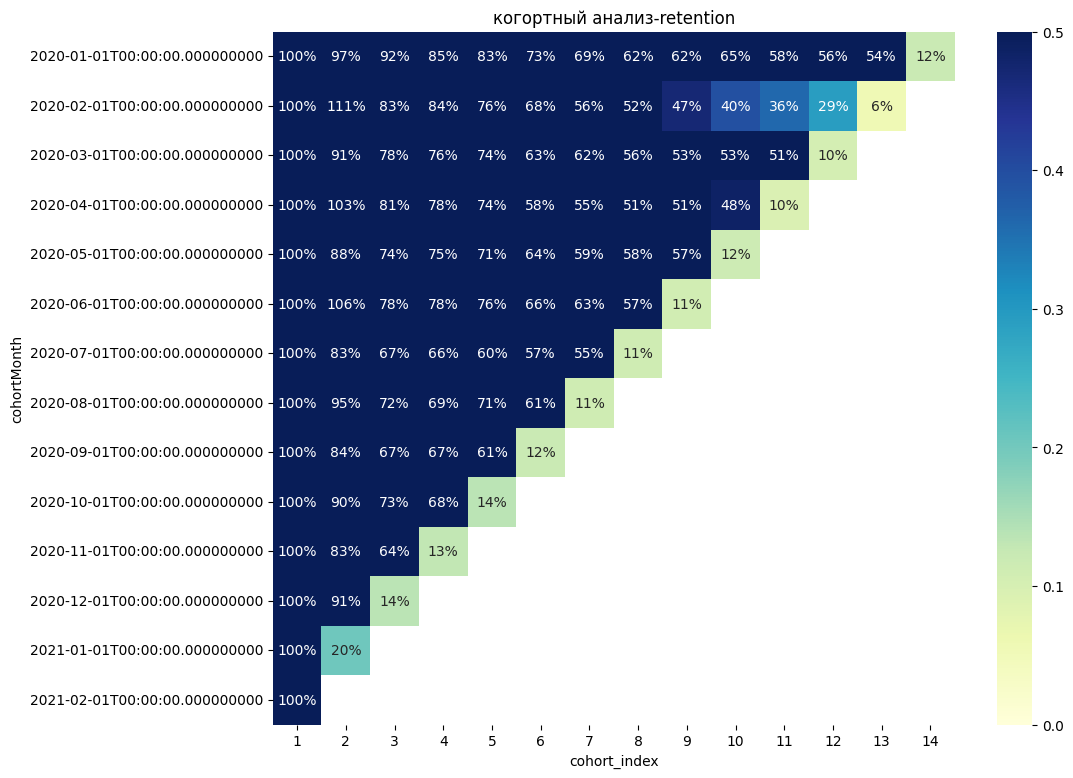

In [33]:
plt.figure(figsize=(11,9))
plt.title('когортный анализ-retention')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu")
plt.show()